In [1]:
from dash import dcc, html, Input, Output, Dash
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/merged_APPA_data.csv', encoding='windows-1252')

In [16]:
df['Month']=df.Data.dt.month


In [5]:
#Plot Weekly  3rd Section
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)
df_week_avg = df[(df.Stazione == "Rovereto") & (df.Inquinante == "Ozono")]
#print(df_week_avg)

In [18]:
# da qui mandare 

df_week_avg["Inverno"] = False
df_week_avg.loc[(df_week_avg.Month>=10) | (df_week_avg.Month <=3), "Inverno"] = True
df_week_avg.reset_index()
#df_week_avg

/tmp/ipykernel_57614/2623227132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week_avg["Inverno"] = False


,index,Stazione,Inquinante,Data,Valore,UnitÃ di misura,Month,Inverno
0,1725415,Rovereto,Ozono,2012-01-01 01:00:00,7.0,Âµg/mc,1,True
1,1725416,Rovereto,Ozono,2012-01-01 02:00:00,5.0,Âµg/mc,1,True
2,1725417,Rovereto,Ozono,2012-01-01 03:00:00,4.0,Âµg/mc,1,True
3,1725418,Rovereto,Ozono,2012-01-01 04:00:00,4.0,Âµg/mc,1,True
4,1725419,Rovereto,Ozono,2012-01-01 05:00:00,7.0,Âµg/mc,1,True
...,...,...,...,...,...,...,...,...
92918,1818333,Rovereto,Ozono,2022-07-07 20:00:00,136.0,Âµg/mc,7,False
92919,1818334,Rovereto,Ozono,2022-07-07 21:00:00,138.0,Âµg/mc,7,False
92920,1818335,Rovereto,Ozono,2022-07-07 22:00:00,129.0,Âµg/mc,7,False
92921,1818336,Rovereto,Ozono,2022-07-07 23:00:00,117.0,Âµg/mc,7,False


In [19]:
#df_week_avg = df_week_avg.groupby(pd.PeriodIndex(df_week_avg['Data'], freq="W"))['Valore'].mean()
df_day_week_avg = df_week_avg.groupby(['Inverno',df_week_avg.Data.dt.day_of_week]).mean()
df_day_week_avg = df_day_week_avg.reset_index()
print(df_day_week_avg)


    Inverno  Data     Valore     Month
0     False     0  71.432692  6.432993
1     False     1  71.644562  6.439577
2     False     2  72.986034  6.440156
3     False     3  75.034254  6.422967
4     False     4  76.111261  6.446549
5     False     5  77.015167  6.443160
6     False     6  77.149775  6.437481
7      True     0  25.666515  6.377149
8      True     1  23.754198  6.382242
9      True     2  23.400696  6.299652
10     True     3  23.364633  6.314603
11     True     4  22.719691  6.310580
12     True     5  25.004356  6.331531
13     True     6  29.627813  6.313981


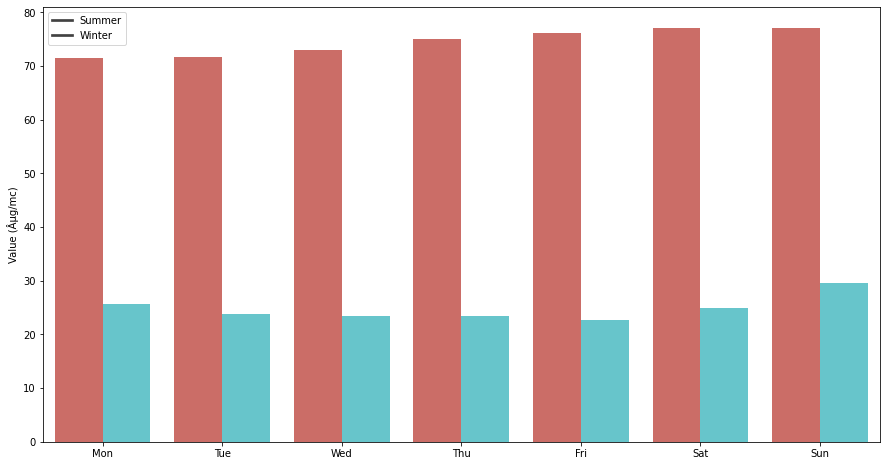

In [15]:

plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="Data", hue= "Inverno",palette='hls', data=df_day_week_avg)

plt.xlabel("")
plt.ylabel("Value (Âµg/mc)")
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.legend(["Summer", "Winter"])